# Data Preprocessing - Feature Engineering

| ID | Name | Country | Age | Member | Score A | Score B | Class |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| 7896 | Mark | Canada | 45 | 1 | 180 | 9 | A
| 9865 | Yuze | Japan | | 0 | 165 | 8.5 | B
| 4678 | Becky | USA | 38 | Y | 140 | 6 | B
| 3324 | Mike | 890 | 50 | 0 | 90 | 8.7 | C
| 7896 | Mark | Canada | 45 | 1 | 180 | 9 | A
| 7896 | Jose | Mexico | 98 | 0 | 60.5 | 5 | A
| 8962 | Emma | Germany | 39 | 1 | 140 | 8 | B



- Missing data in Age column. We can use imputation or drop nulls
- Data type mismatch:
    - Wrong data value in Country column. Use `replace()`
    - Member column has a flag of 0,1 and Y (might be a wrong data entry 1). Use `replace()`
- Score A and B have different scales. Need scaling or normalization
- Inconsistent numerical data type for Score B and A. May not be an issue, but need check if int values had their decimals dropped
- Potential outliers:
    - Score A has 60.5
    - Age has 98
- Same ID is assigned to different names (Mark and Jose)
- Duplicates for row with Mark `drop_duplicates()`
- There's an opportunity to bin the age data. e.g. bin1 = ages 10 to 30 
- Categorical variables in some columns. For example, Class needs to be encoded (A, B, C = 1,2,3)

## What Are Features?

- They are individual measurable properties or characteristics of the population or phenomena being observed
- In ML, they are the input variables used by the algorithm to make predictions or perform classification.
- For supervised learning we have features that are called Independent variables that effect the depend variable
- Having good features is critical for both data analysis and the ML model's performance
- Features can be:
    - Numerical: e.g. weight, age, income, cholesterol level, etc...
    - Categorical: e.g. gender, color, country, etc...
        - Normal
        - Ordinal: categories with an inherent order. e.g. level of education, hotel star rating, etc...
    - Binary: True or False (0 or 1)
- For a 2-d dataset (tabular data), features are columns

## What Is Feature Engineering?
- It's the process of using domain knowledge and technical expertise to modify existing or create new features to improve the performance of a machine learning model
- Advantages:
    - Boosts model performance
    - Improves data analysis and visualization
    - Reduces overfitting (will be covered in ML course)
    - Improves computational performance
    - Uncovers hidden insights

>"Feature Engineering is the magic touch of AI and ML"

- Disadvantages
    - Possible data loss for outlier removal (example)
    - Some feature engineering techniques could add more processing demand
    - Methodology may need ot be updated with data and population changes


## Preprocessing and Feature Engineering Techniques
Most common techniques:
- **Imputation**: handling missing values (removing/replacing)
- **Outlier Treatment**: removing/replacing outliers
- **Encoding**: converting categorical values into numerical
- **Scaling**: normalizing/standardizing the range of numeric features
- **Feature Extraction**:
    - Binning: Converting continuous values to intervals (categories)
    - Extracting Information: from existing data you can derive new indicators or values from existing features
    - Grouping Operations/Aggregation: average score from math, reading, and writing scores
- **Dimensionality Reduction**: reducing the number of features (feature selection or merging)

## Imputation and Handling Missing Values
- The replacement of missing or inconsistent values with approximated values.
- An alternative of imputation is dropping rows with null values
- Imputation is the art of replacing missing data points with meaningful data.
- Missing data can occur for various reasons:
    - Errors in data collection
    - Equipment malfunction
    - In a survey, respondents skipped a question (intentional)
- Machines don’t handle missing data situations well

#### Basic Imputation Techniques

- **Basic Imputation** techniques, it depends on the data type:
    - For **numerical** data:
        - Measures of Central Tendency (Mean/Median/Mode)
        - Arbitrary (requires domain knowledge) 
        - Give 0 for "no measurement"
    - For **categorical** data
        - Mode (most frequent category)
        - Arbitrary (requires domain knowledge)
        - Provide a label called "missing"
- When to use:
    - Use overall Mean/Mode/Median when the data is missing at random 
    - Use a specific mean to a sub-group when the data is missing for that group only (e.g. salaries by state)
    - Rows with missing data look like most of the other observations (are not outliers)

- Pros:
    - Easy to implement
    - Simple syntax and fast processing
    - Can be used in a production pipeline (cost effective) and for different systems: SQL, Python, Other ETL tools, etc...

- Cons:
    - Possibility of distorting your data distribution (changing variance and covariance) 
        - NOTE: the effect is more noticeable when you have a high number of missing values
    - It only works on individual column level 
        - NOTE: if you use the sophisticated/specific imputation technique for sub-groups, it helps reduce this issue


> NOTE: If you have a high ratio (over 30% for example) of missing values, it's not recommended to proceed with imputation as it will cause more harm than good.

> There are 2 popular libraries for imputation: `pandas` and `sklearn` 

About `sklearn`:
- It's the gold standard for DS and ML for feature engineering and preprocessing, model building and automation, and evaluation
- Built on NumPy, SciPy, and matplotlib
- To install, use: `pip install scikit-learn`
- To import, `import sklearn` 
- Very comprehensive:
    - Tools for data preprocessing
    - Machine Learning algorithms
    - Performance Measurement
    - Machine Learning Automation

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
students = {
    'Name' : ['Mark', 'Alex', 'John', 'Amy', 'Steve', 'Ally', 'Kelly', 'Todd'],
    'Score' : [40, np.NaN, 44, np.NaN, 26, 39, 42, np.NaN],
    'University' : ['UTC', np.NaN, 'MSU', 'MIT', 'CalTech', 'CalTech', 'CalTech', 'MSU'],
}

df = pd.DataFrame(students)
df

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,NaN,NaN
2,John,44.0,MSU
3,Amy,NaN,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,NaN,MSU


Using `sklearn`

In [3]:
df_1 = df.copy()

In [3]:
#replace nulls with average
imputer = SimpleImputer(strategy='mean') # if your missing values are not NaN, then you can specify using 'missing_values=' attribute

# apply the imputer method on the score column
# easier method
df_1['Score'] = imputer.fit_transform(df_1[['Score']]) 


# we need to reshape because the output from sklearn is in horizontal array form
# basically convert from horizontal to vertical array (columns)
df_1['Score'] = imputer.fit_transform(df_1['Score'].values.reshape(-1,1)) 



df_1

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,38.2,NaN
2,John,44.0,MSU
3,Amy,38.2,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,38.2,MSU


Using `pandas`

In [4]:
df_2 = df.copy()

In [5]:
df_2['Score'] = df_2['Score'].fillna(df_2['Score'].mean())
df_2

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,38.2,NaN
2,John,44.0,MSU
3,Amy,38.2,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,38.2,MSU


> **NOTE:** If the column/feature that is being imputed is heavily skewed, it is recommended to use median instead of mean.

Reminder:
 
![skewness](https://www.biologyforlife.com/uploads/2/2/3/9/22392738/c101b0da6ea1a0dab31f80d9963b0368_orig.png)

For categorical

In [6]:
imputer = SimpleImputer(strategy='most_frequent')

df_1['University'] = imputer.fit_transform(df_1[['University']])[:,0]
df_1

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,38.2,None
2,John,44.0,MSU
3,Amy,38.2,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,38.2,MSU


Using an arbitrary value

In [6]:
df_1a = df.copy()
imputer = SimpleImputer(strategy='constant', fill_value='missing')
df_1a['University'] = imputer.fit_transform(df_1a[['University']])[:,0]
df_1a

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,NaN,missing
2,John,44.0,MSU
3,Amy,NaN,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,NaN,MSU


> NOTE: be care with using arbitrary as it requires domain knowledge.

Using `pandas`

In [7]:
df_2['University'] = df_2['University'].fillna(df_2['University'].mode()) # some versions need to have [0] added
df_2

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,38.2,NaN
2,John,44.0,MSU
3,Amy,38.2,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,38.2,MSU


#### Dropping Nulls (instead of imputation)

In [8]:
df_3 = df.copy()

df_3 = df_3.dropna()
#df_3.dropna(inplace=True)

df_3

,Name,Score,University
0,Mark,40.0,UTC
2,John,44.0,MSU
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech


- When to use:
    - when the data is missing at random 
    - When the percentage of missing values is below 5% of the dataset (lower impact on information loss)

- Pros:
    - Easy to implement
    - Simple syntax and fast processing
    - Can be used in a production pipeline (cost effective) and for different systems: SQL, Python, Other ETL tools, etc...
    - It doesn't impact the skewness of the column with missing data

- Cons:
    - Possibility of distorting your data distribution (changing variance and covariance) for other columns
        - NOTE: the effect is more noticeable when you have a high number of missing values
    - It only works on individual column level 
        - NOTE: if you use the sophisticated/specific imputation technique for sub-groups, it helps reduce this issue

#### More Sophisticated Approach

Example: using mean of subgroups instead of a broad mean value.

Rebuild the data to have more bundled categories

In [9]:
students = {
            'Name' : ['Mark', 'Alex', 'John', 'Amy', 'Steve', 'Ally', 'Kelly', 'Todd', 'Noel'],
            'Score' : [40, np.nan, 44, np.nan, 26, 39, 42, np.nan, 51],
            'University' : ['UTC', 'MSU', 'MSU', 'CalTech', 'CalTech', 'CalTech', 'CalTech', 'MSU', 'MSU'],
            }

df = pd.DataFrame(students)
df

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,NaN,MSU
2,John,44.0,MSU
3,Amy,NaN,CalTech
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,NaN,MSU
8,Noel,51.0,MSU


We can see that we have samples of CalTech and MSU to fill missing values

In [10]:
df.groupby('University')['Score'].mean()

University
CalTech    35.666667
MSU        47.500000
UTC        40.000000
Name: Score, dtype: float64

We can use the `transform()` function leverage groupby

In [11]:
df['Score'] = df.groupby('University')['Score'].transform(lambda s: round(s.fillna(s.mean()),2))
df

,Name,Score,University
0,Mark,40.00,UTC
1,Alex,47.50,MSU
2,John,44.00,MSU
3,Amy,35.67,CalTech
4,Steve,26.00,CalTech
5,Ally,39.00,CalTech
6,Kelly,42.00,CalTech
7,Todd,47.50,MSU
8,Noel,51.00,MSU


#### Advanced Imputation Techniques
- Using ML to replace missing values. e.g. K- Nearest Neighbor (KNN) Imputation
- Multiple Imputation by Chained Equations (MICE)
- Extrapolation and Interpolation

##### **Pros**
- It analyzes the underlying relationship with other features ( the whole dataset)

##### **Cons**
- Computationally heavy on the system
- Might be complex

##### Using KNN

In [10]:
from sklearn.impute import KNNImputer

In [11]:
X = [[1, 4, 6, np.NaN],
     [8, 6, 5, 4],
     [1, 8, np.NaN, 10],
     [4, np.NaN, 6, 9]
     ]
X

[[1, 4, 6, nan], [8, 6, 5, 4], [1, 8, nan, 10], [4, nan, 6, 9]]

In [12]:
imputer = KNNImputer(n_neighbors=2)

imputer.fit_transform(X)

array([[ 1. ,  4. ,  6. ,  9.5],
       [ 8. ,  6. ,  5. ,  4. ],
       [ 1. ,  8. ,  6. , 10. ],
       [ 4. ,  6. ,  6. ,  9. ]])

##### Extrapolation Technique
is recommended for time series data

In [19]:
data = {
    'Time': [ 1,2,3,4,5,6,7,8,9,10],
    'Value': [10, 20, 18, np.nan, 40, 46, np.nan, np.nan, 58, 62]
}

df = pd.DataFrame(data)
df

,Time,Value
0,1,10.0
1,2,20.0
2,3,18.0
3,4,NaN
4,5,40.0
5,6,46.0
6,7,NaN
7,8,NaN
8,9,58.0
9,10,62.0


In [20]:
from scipy.interpolate import interp1d 

In [21]:
missing_val_indices = df[df['Value'].isna()].index
missing_val_indices

Index([3, 6, 7], dtype='int64')

In [22]:
# Identify indices with missing values
missing_indices = df[df['Value'].isna()].index

# Separate known points (for interpolation/extrapolation)
known_time = df['Time'][~df['Value'].isna()]
known_value = df['Value'][~df['Value'].isna()]

# Create interpolation function with extrapolation
interp_function = interp1d(known_time, known_value, fill_value="extrapolate")

# Apply the function to missing indices
df.loc[missing_indices, 'Value'] = interp_function(df['Time'][missing_indices])

## Outlier Treatment

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
data_url = 'https://lib.stat.cmu.edu/datasets/boston'

In [15]:
# if you get an ssl certificate error
import ssl
ssl._create_default_https_context = ssl._create_unverified_context #deactivate SSL Cert Error

 1. skip the dataset header block
 2. avoid using the first row as a header
 3. use a delimiter (space in this dataset) capture any gap between columns regardless to its length

In [16]:
raw_df = pd.read_csv(data_url, skiprows=22, header=None, sep='\s+')
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


- Based on the data dictionary, we should have 14 columns
- Here, we see 11 columns only. This is because the 3 missing columns are available in every other row (the rows are wrapped)
- grab every second row and merge it with the odd numbered row

In [17]:
raw_df.values[0::2, :] #grab every even numbered row

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.0000e+00, 2.9600e+02,
        1.5300e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 2.0000e+00, 2.4200e+02,
        1.7800e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 2.0000e+00, 2.4200e+02,
        1.7800e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 1.0000e+00, 2.7300e+02,
        2.1000e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 1.0000e+00, 2.7300e+02,
        2.1000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 1.0000e+00, 2.7300e+02,
        2.1000e+01]])

In [18]:
data = np.hstack([raw_df.values[0::2, :], raw_df.values[1::2, :3]])
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


1. Use tab as a delimiter 
2. skipping the block of text after 7 rows
3. We're capturing the first 14 rows only ( need the columns not the data)
4. avoid using the first row as the head

In [19]:
raw_cols = pd.read_csv(data_url, sep='\t', skiprows=7, nrows=14, header=None)
raw_cols

,0
0,CRIM per capita crime rate by town
1,ZN proportion of residential land zoned...
2,INDUS proportion of non-retail business ac...
3,CHAS Charles River dummy variable (= 1 if...
4,NOX nitric oxides concentration (parts p...
5,RM average number of rooms per dwelling
6,AGE proportion of owner-occupied units b...
7,DIS weighted distances to five Boston em...
8,RAD index of accessibility to radial hig...
9,TAX full-value property-tax rate per $10...


4. Get rid of the column definitions 

In [20]:
col_names = list(raw_cols[0].str.split().str[0]) # it splits by space by default
col_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [21]:
df.columns = col_names

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Description:
 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.
 
Data Dictionary:
- **CRIM**     :    per capita crime rate by town
- **ZN**       :    proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**    :    proportion of non-retail business acres per town
- **CHAS**     :    Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX**      :    nitric oxides concentration (parts per 10 million)
- **RM**       :    average number of rooms per dwelling
- **AGE**      :    proportion of owner-occupied units built prior to 1940
- **DIS**      :    weighted distances to five Boston employment centres
- **RAD**      :    index of accessibility to radial highways
- **TAX**      :    full-value property-tax rate per $10,000
- **PTRATIO**  :    pupil-teacher ratio by town
- **B**        :    1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT**    :    % lower status of the population
- **MEDV**     :    Median value of owner-occupied homes in $1000's

**Let's perform some EDA on the data**

- **MEDV** is our target (dependent variable or predicted column)
- **Other columns** are features (independent variables)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [23]:
df.isna().sum().sum()

0

In [24]:
df.drop(columns='CHAS').describe() # removing CHAS because it's a binary categorical flag

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

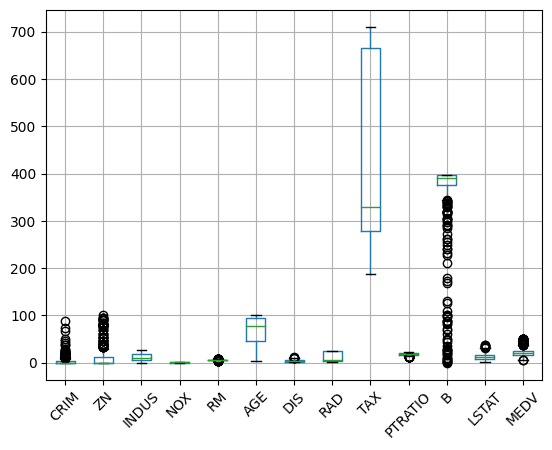

In [25]:
plt.figure(figsize=(12,6))
df.drop(columns='CHAS', axis=1).boxplot(rot=45)


- Since the features have various ranges, we need to have one boxplot for each
- To use subplots, we're break it into 7 x 2 grid
- 14 columns = 13 box plots and 1 (categorical) countplot

<Axes: xlabel='CHAS', ylabel='count'>

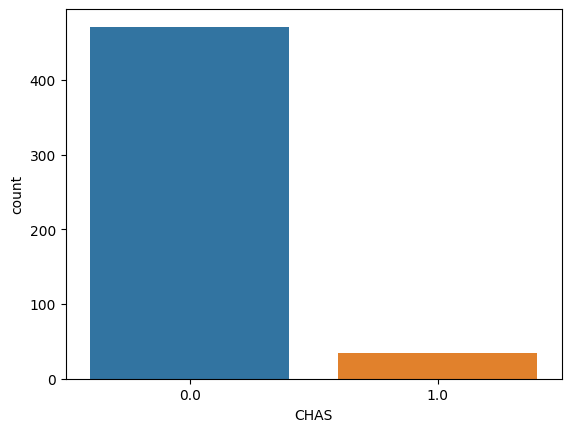

In [26]:
sns.countplot(data=df, x=df['CHAS'])

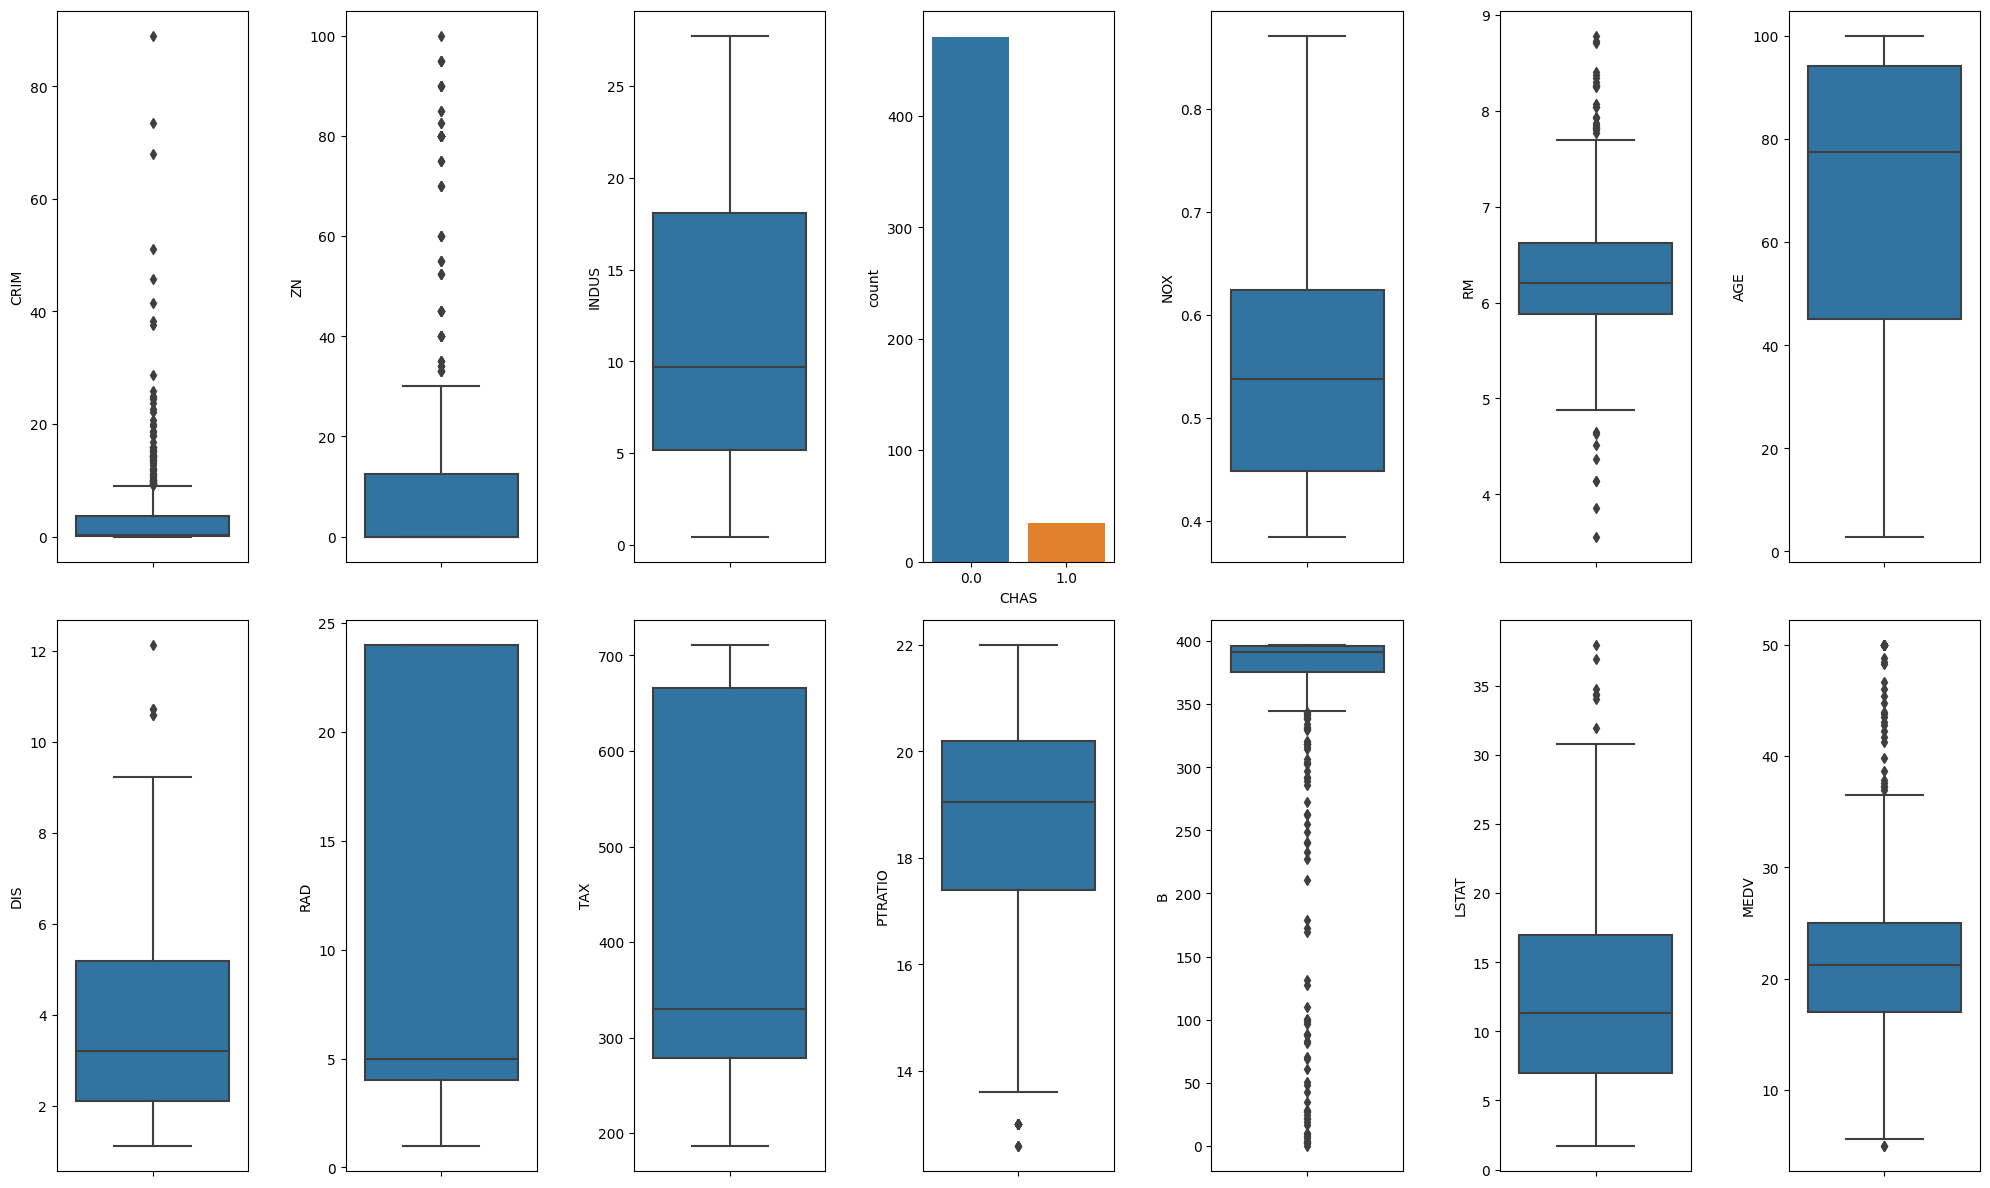

In [27]:

fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(20,12), dpi=300)

#flatten the axes index (0,1,2,3)
axes = axes.flatten()

for index, col in enumerate(df.columns):
    if col == 'CHAS':
        sns.countplot(data=df, x=col, ax=axes[index])
    else:
        sns.boxplot(data=df, y=col, ax=axes[index])

fig.tight_layout(w_pad=3, h_pad=2)

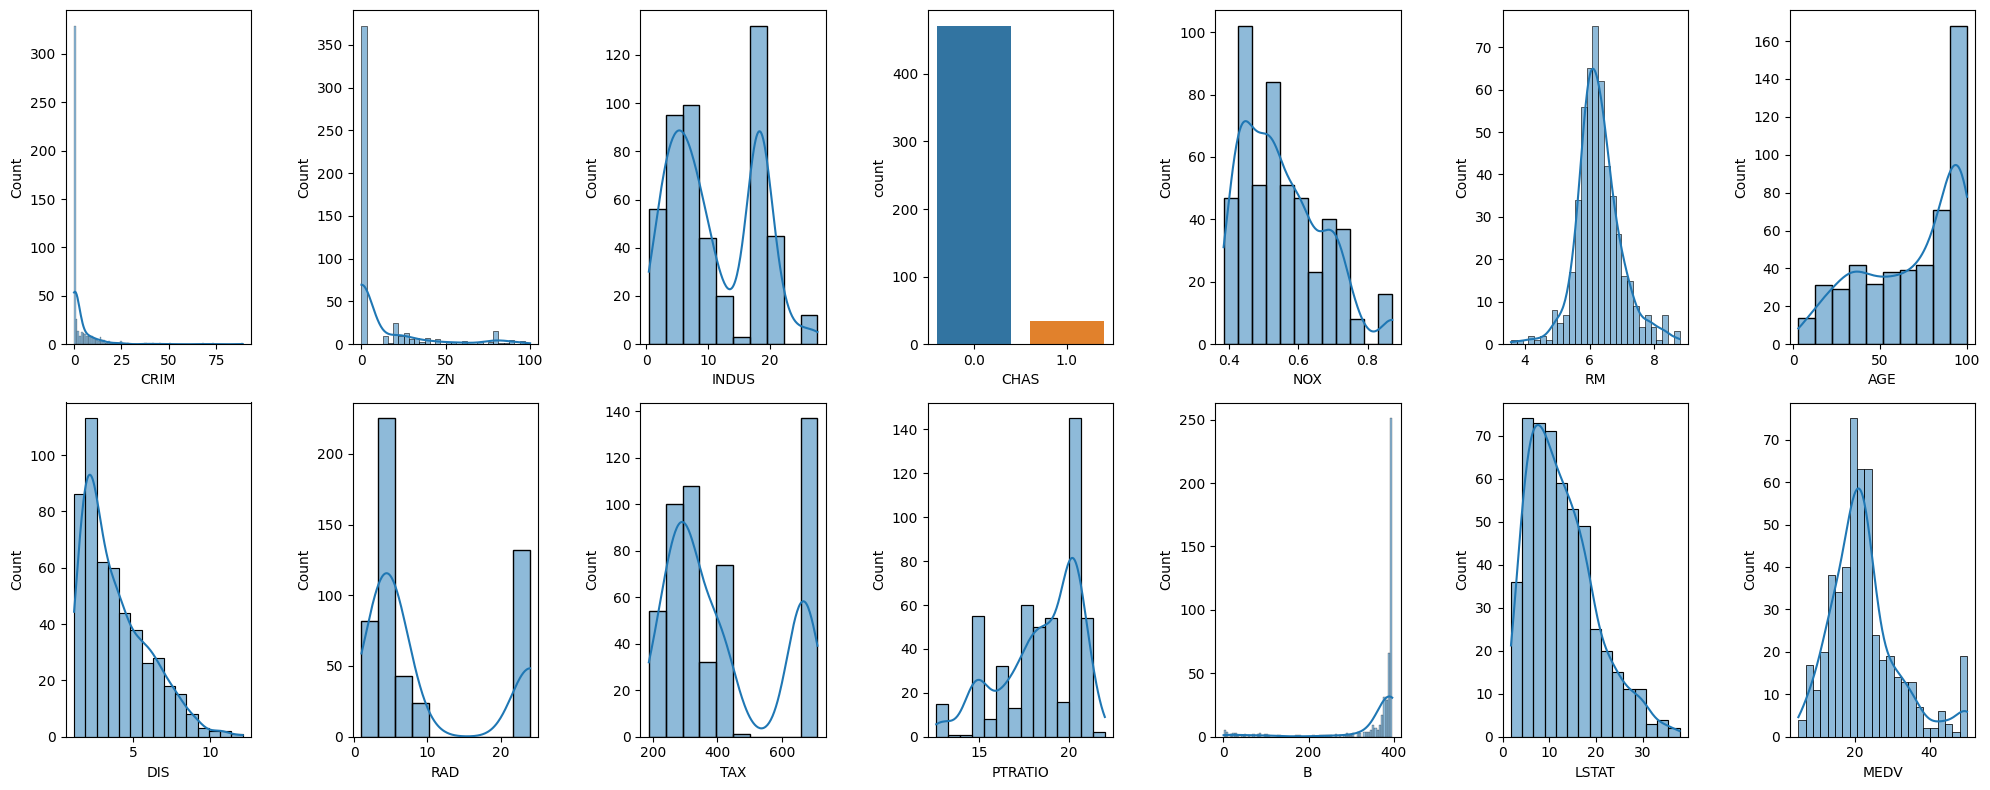

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(20,8))

#reset the index for chart location in the grid
index = 0 
#flatten the axes location into one dimensions to iterate through the list
axes = axes.flatten()

#iterate through key:value in the dataframe (cols and their values)
for k, v in df.items():
    if k == 'CHAS':
        sns.countplot(data=df, x=k, ax=axes[index])
    else:
        sns.histplot(data=df, x=k, ax=axes[index], kde=True) #build a hist for each column
    
    index += 1 #incrementing by 1 for the cell location in the grid

fig.tight_layout(w_pad=3)

**Observations**
- We see multiple columns with outliers e.g. CRIM, ZN, MEDV(target), etc...
- It's recommended to give **Features** the primary focus for outlier treatment and the **Target** is secondary.
- We need to be careful not to do extensive outlier treatment because we'll into high information loss, especially for small datasets
- There 3 common methods of outlier treatment:
    1. IQR (Inter-quartile Range method)
    2. Using Z Score with Standard Deviation (more control to define the threshold)
    3. Using Percentiles/Quintiles (more control to define the threshold)

#### IQR Method

![boxaplot](https://miro.medium.com/max/8100/1*NRlqiZGQdsIyAu0KzP7LaQ.png)

- IQR is an effective method to remove outliers using IQR (the range inside the box), Q3 (75th percentile), and Q1 (25st percentile)
- IQR represents 50% of the population
- The outliers defined by IQR represent approximately 0.7% (0.35% x 2)

In [32]:
def outlier_iqr(col):
    Q1, Q3 = np.percentile(col, [25, 75])
    IQR = Q3 - Q1

    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR

    return lower_range, upper_range

In [34]:
# calculate the upper and lower ranges for MEDV
lower_range, upper_range = outlier_iqr(df['MEDV'])

print('LR:',round(lower_range,2), '\tUR:',round(upper_range,2))

LR: 5.06 	UR: 36.96


Now we can drop outliers using LR and UR

In [35]:
outlier_filter = (df['MEDV'] > lower_range) & (df['MEDV'] < upper_range)

df_no_outliers = df[outlier_filter]

Text(0.5, 1.0, 'After Outlier Treatment')

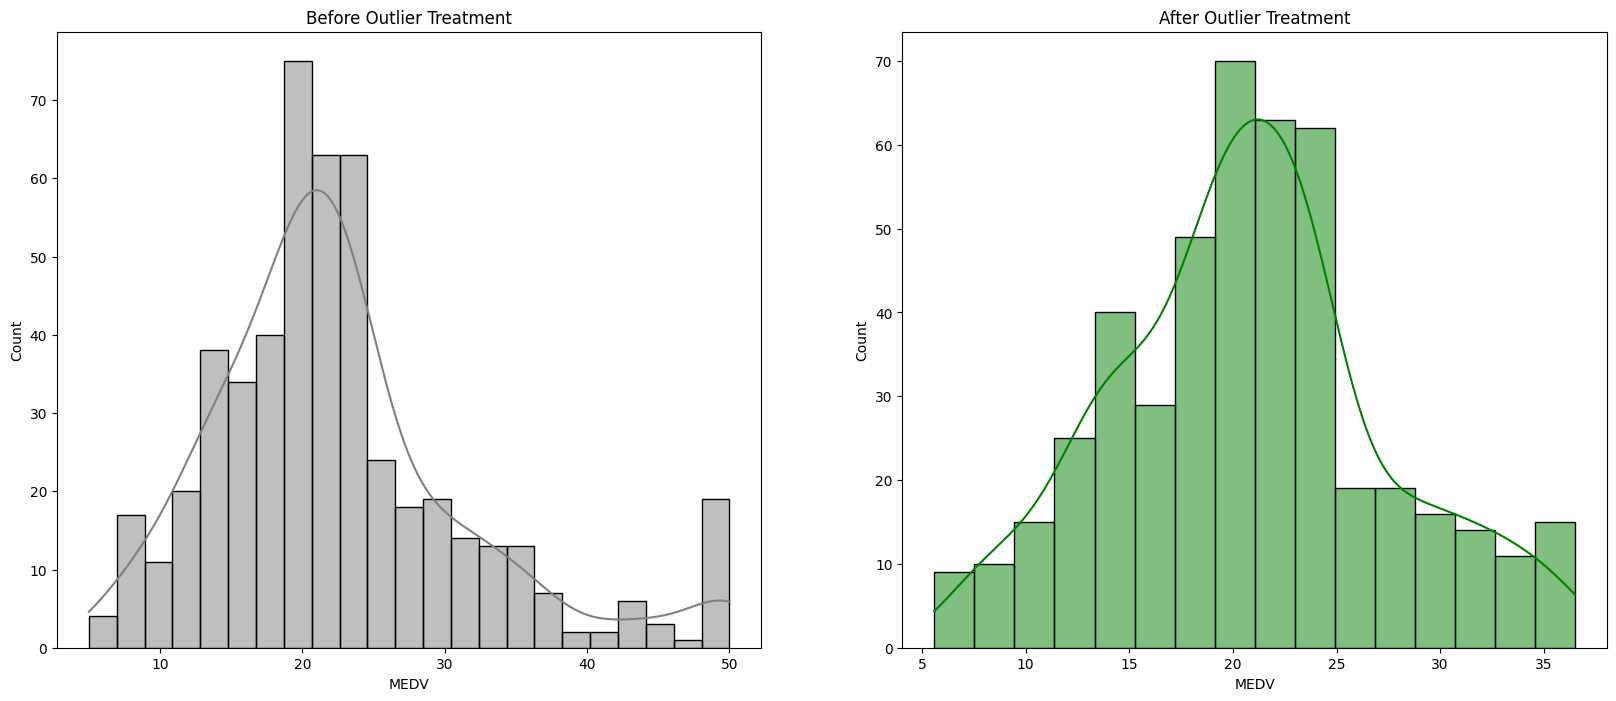

In [41]:
ig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
axes = axes.flatten()
sns.histplot(x=df['MEDV'], ax=axes[0], color='grey', kde=True)
axes[0].set_title('Before Outlier Treatment')
sns.histplot(x=df_no_outliers['MEDV'],ax=axes[1], color='green', kde=True)
axes[1].set_title('After Outlier Treatment')


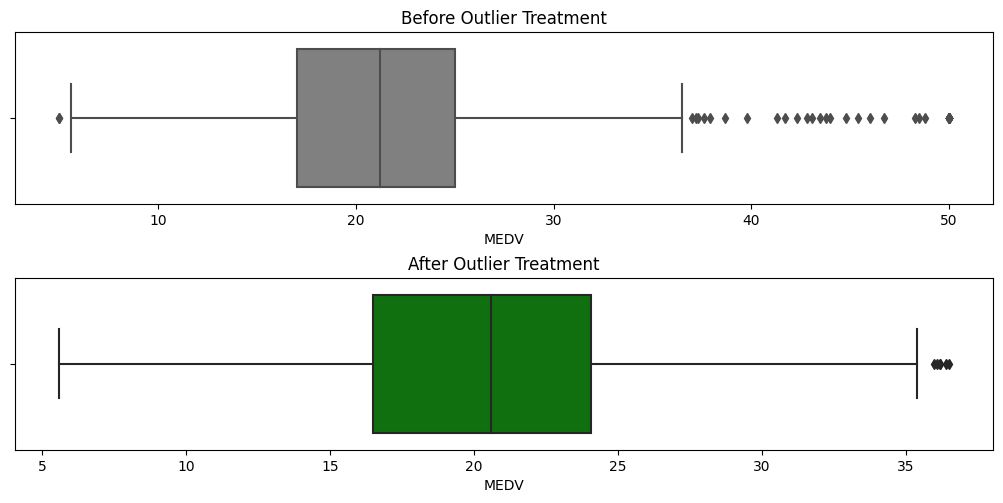

In [47]:
ig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,5))
axes = axes.flatten()
sns.boxplot(x=df['MEDV'], ax=axes[0], color='grey')
axes[0].set_title('Before Outlier Treatment')
sns.boxplot(x=df_no_outliers['MEDV'],ax=axes[1], color='green')
axes[1].set_title('After Outlier Treatment')
plt.tight_layout(pad=0.6, h_pad=3)

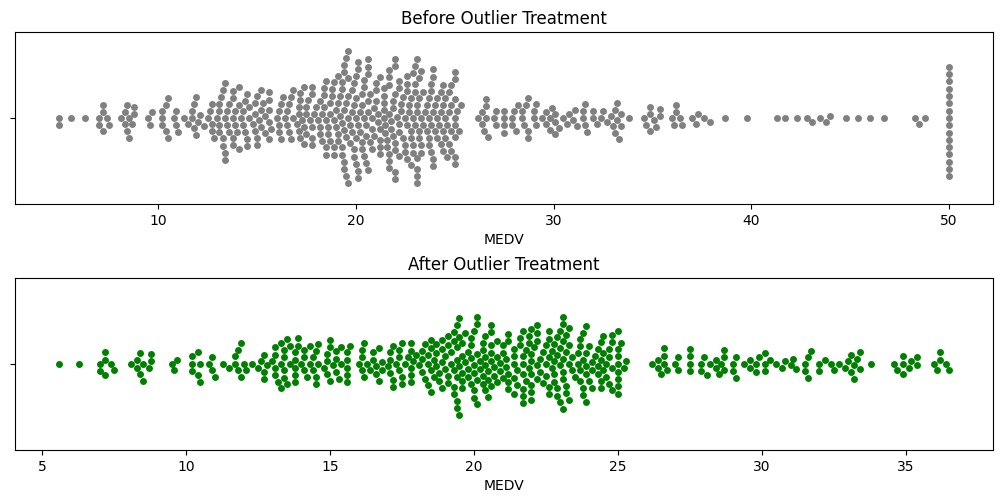

In [48]:
ig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,5))
axes = axes.flatten()
sns.swarmplot(x=df['MEDV'], ax=axes[0], color='grey')
axes[0].set_title('Before Outlier Treatment')
sns.swarmplot(x=df_no_outliers['MEDV'],ax=axes[1], color='green')
axes[1].set_title('After Outlier Treatment')
plt.tight_layout(pad=0.6)

> It's always recommended to check the impact of outlier treatment:
> 1. If removing outliers increases the skewness of the rest of the columns
> 2. If removing outliers causes a big loss of information


In [50]:
df.drop(columns='CHAS').skew(skipna=True)

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

Check if the skewness after outlier treatment got higher

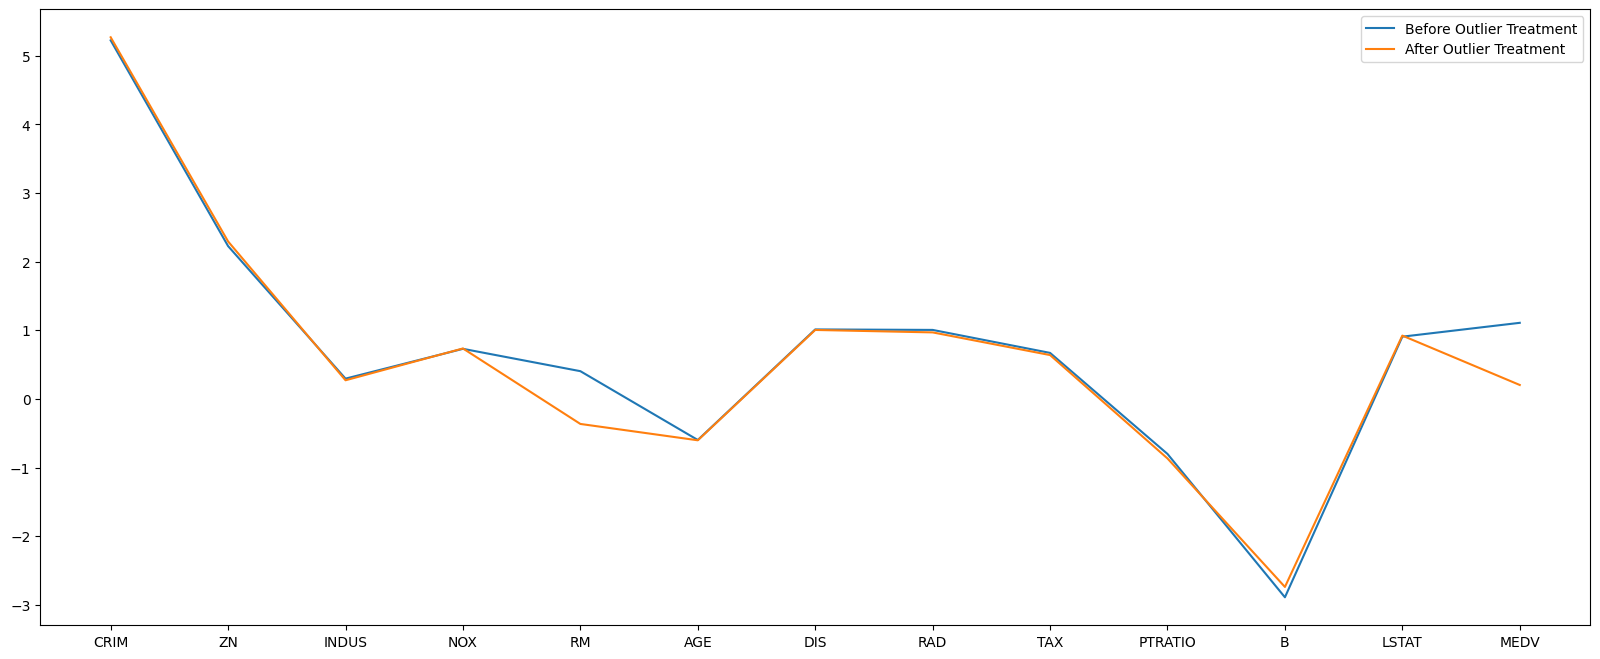

In [61]:
plt.figure(figsize=(20,8))
plt.plot(df.drop(columns='CHAS').skew(skipna=True), label='Before Outlier Treatment')
plt.plot(df_no_outliers.drop(columns='CHAS').skew(skipna=True), label='After Outlier Treatment')
plt.title('Skewness Analysis')
plt.legend()

- We can see the process of outlier removal for MEDV is slightly better for RM, B, and MEDV features, unchanged for others
- There's no negative impact on the distribution or skewness of the data after outlier treatment to MEDV
- The skewness of column RM got flipped from positive to negative after doing outlier treatment to MEDV

<Axes: xlabel='MEDV', ylabel='RM'>

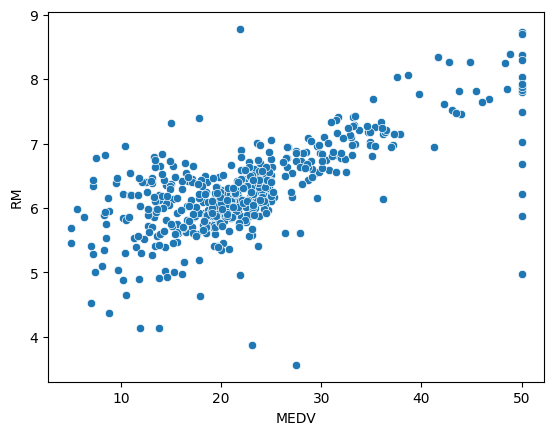

In [62]:
sns.scatterplot(x=df['MEDV'],y=df['RM'])

<Axes: xlabel='MEDV', ylabel='RM'>

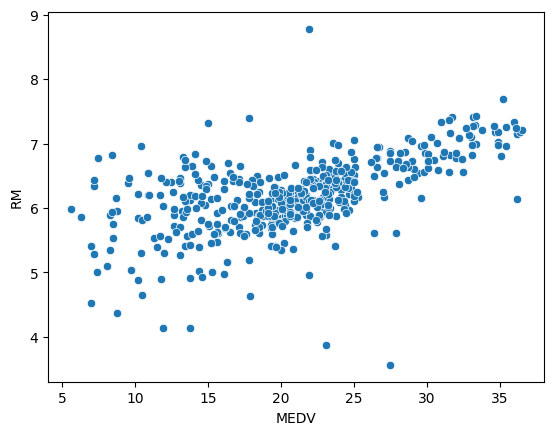

In [63]:
sns.scatterplot(x=df_no_outliers['MEDV'],y=df_no_outliers['RM'])

#### Z-Score and Standard Deviation Method

In [90]:
df = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/HousePrices.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


<Axes: xlabel='price'>

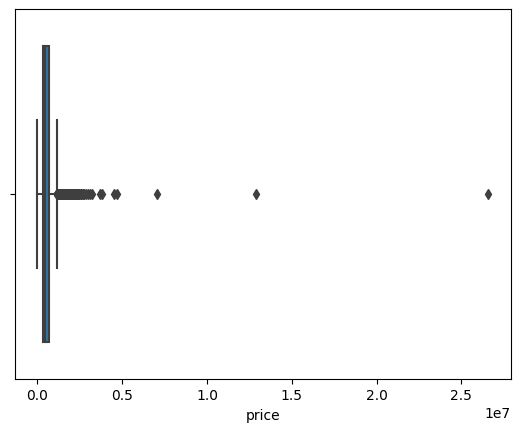

In [91]:
# outlier treatment for price column
sns.boxplot(x=df['price'])

In [92]:
max_val = df['price'].max()
print(f'Max Price Value: {max_val:,}')

Max Price Value: 26,590,000.0


Price column is our target and it's heavily skewed.

Steps:
1. Standardize the targeted column (convert its values to z-scores)
2. Use the desired Standard Deviation value to trim the upper and lower ranges

In [93]:
from scipy.stats import zscore

In [94]:
df['price_zscore'] = zscore(df['price'])

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price_zscore
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,-0.423864
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,3.249598
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,-0.372424
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,-0.234071
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,-0.003482


In [138]:
lower_threshold = -2.5
upper_threshold = 2

df['outliers'] = np.where(df['price_zscore']>upper_threshold, True
                          , np.where(df['price_zscore']<lower_threshold, True, False))

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price_zscore,outliers
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,-0.423864,False
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,3.249598,True
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,-0.372424,False
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,-0.234071,False
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,-0.003482,False


In [139]:
df['outliers'].value_counts()

outliers
False    4513
True       87
Name: count, dtype: int64

In [140]:
#test our logic
df[df['price_zscore']>upper_threshold].head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price_zscore,outliers
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,3.249598,True
122,2014-05-05 00:00:00,2280000.0,7.0,8.0,13540,307752,3.0,0,4,3,9410,4130,1999,0,26408 NE 70th St,Redmond,WA 98053,USA,3.065127,True
217,2014-05-06 00:00:00,1870000.0,5.0,4.0,4510,15175,2.0,0,0,3,4510,0,1969,2002,8300 SE 82nd St,Mercer Island,WA 98040,USA,2.337884,True
227,2014-05-06 00:00:00,1800000.0,5.0,5.0,4490,10279,2.0,0,0,3,3930,560,2013,1923,1435 104th Ave SE,Bellevue,WA 98004,USA,2.213721,True
252,2014-05-07 00:00:00,3200000.0,7.0,4.5,6210,8856,2.5,0,2,5,4760,1450,1910,0,1230 Warren Ave N,Seattle,WA 98109,USA,4.696988,True


In [141]:
df[df['outliers']== False]['price'].max()

1675000.0

In [142]:
df[df['outliers']==True]['price'].max()

26590000.0

<Axes: xlabel='price'>

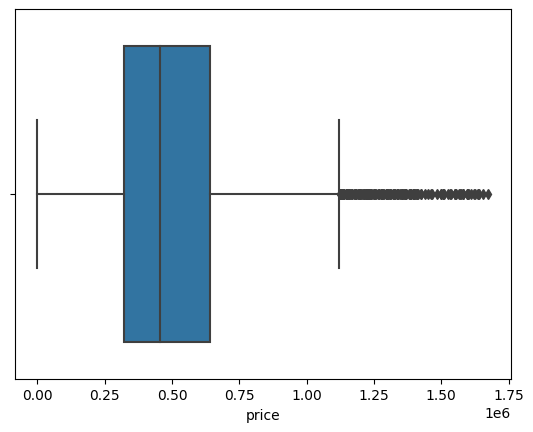

In [143]:
sns.boxplot(x=df[df['outliers']== False]['price'])

<Axes: xlabel='price', ylabel='Count'>

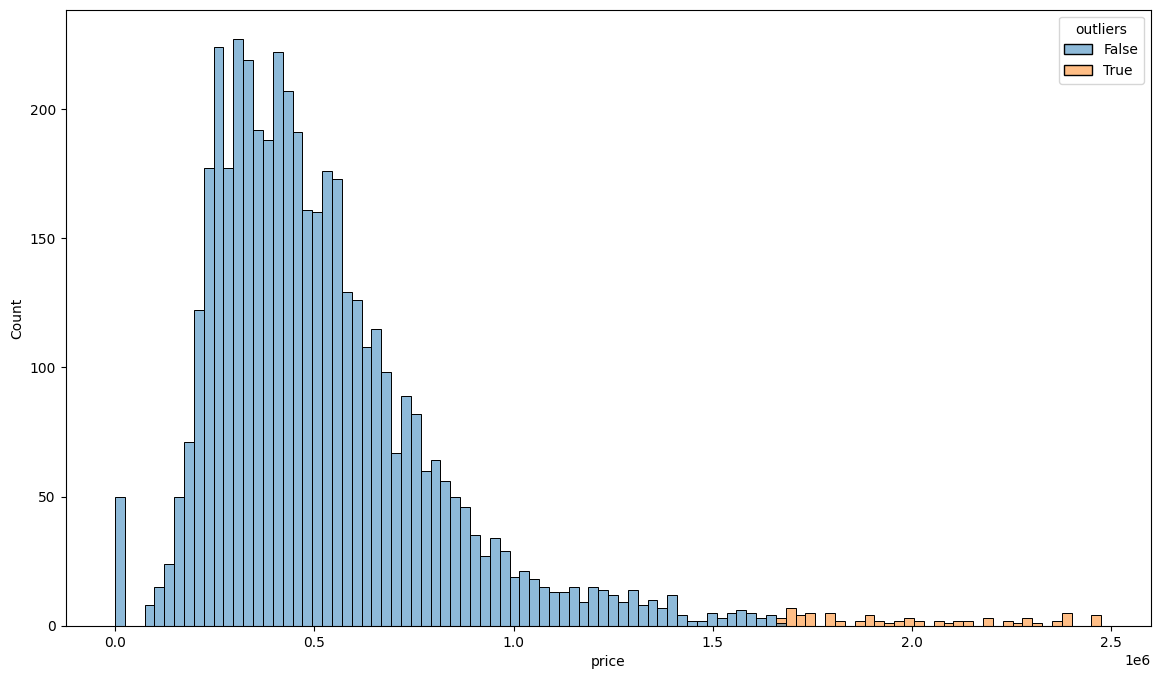

In [144]:
plt.figure(figsize=(14,8))
# trim some of the extreme values and show the rest of the outliers (below $2.5 mil)
sns.histplot(data=df[df['price']<2500000], x='price', bins=100, hue=df['outliers'])

<Axes: xlabel='price_zscore', ylabel='Count'>

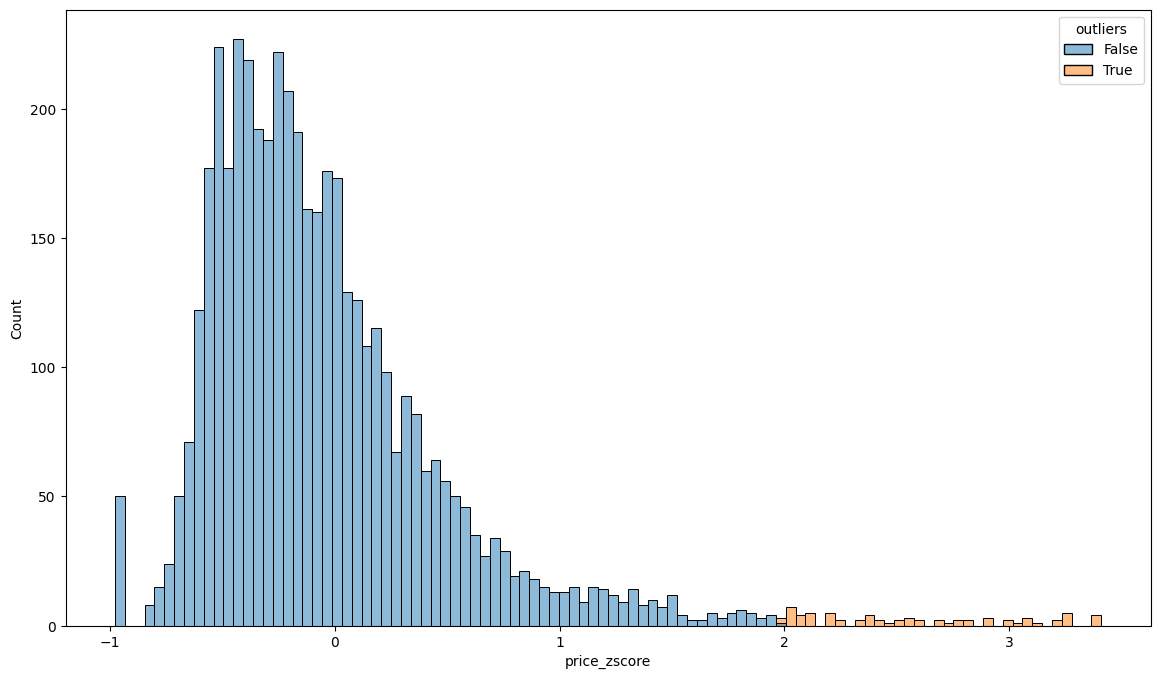

In [145]:
plt.figure(figsize=(14,8))
# trim some of the extreme values and show the rest of the outliers (below $2.5 mil)
sns.histplot(data=df[df['price']<2500000], x='price_zscore', bins=100, hue=df['outliers'])

Text(0.5, 1.0, 'After Outlier Treatment')

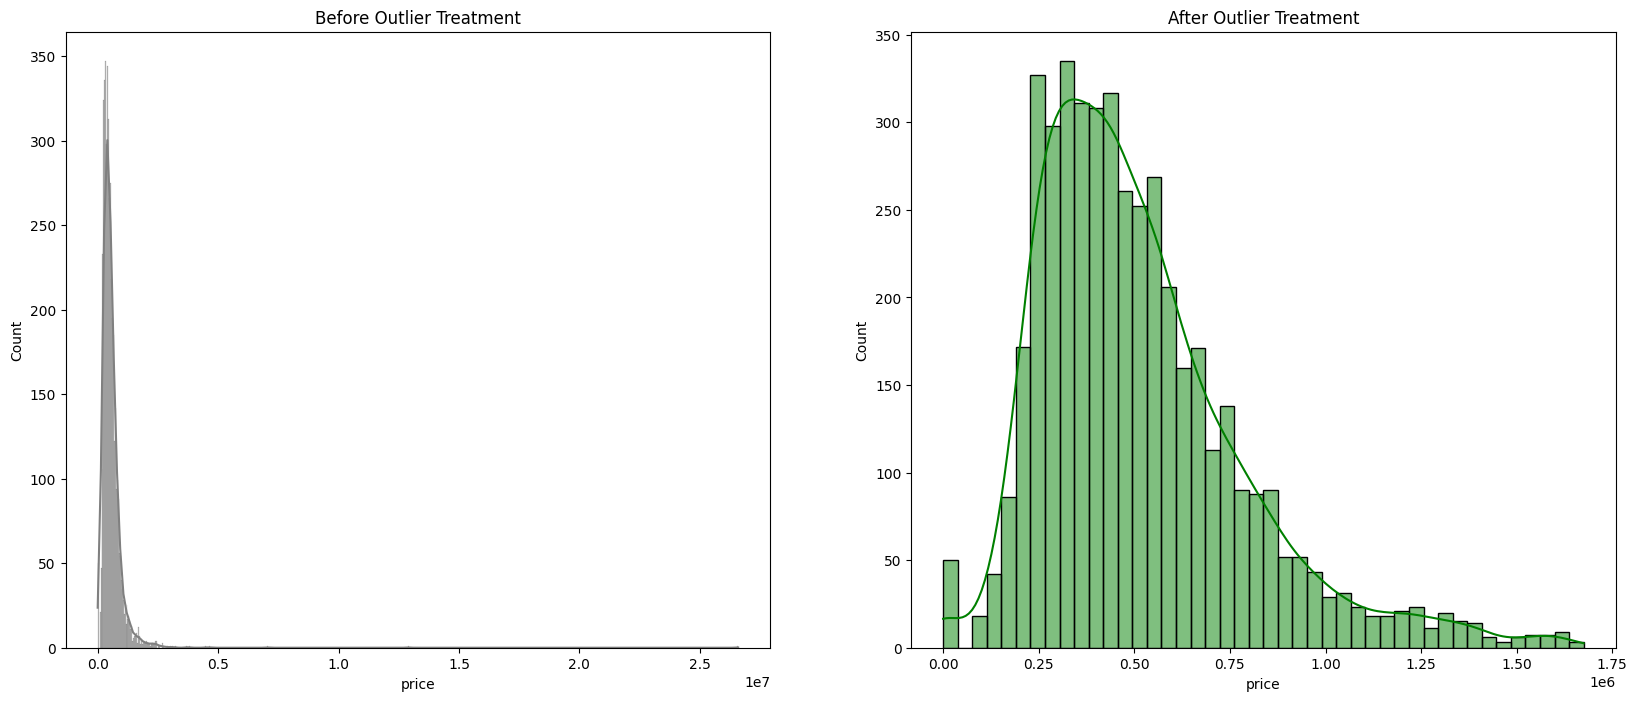

In [146]:
ig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
axes = axes.flatten()
sns.histplot(data=df,x='price', ax=axes[0], color='grey', kde=True)
axes[0].set_title('Before Outlier Treatment')

sns.histplot(data=df[df['outliers']==False],x='price',ax=axes[1], color='green', kde=True)
axes[1].set_title('After Outlier Treatment')


#### Percentiles Method

In [147]:
lower_range, upper_range = np.percentile(df['price'],[5,95])
print('Lower Range:',lower_range, 'Upper Range',upper_range)

Lower Range: 200000.0 Upper Range 1184050.0000000002


> Go to feature engineering and preprocessing 2 notebook

### Encoding

- In ML, many algorithms expect numerical input and cannot directly handle categorical text data.
- Encoding is used to transform categorical text data into a numerical format, enabling ML algos to process and understand patterns in the data. 
    - e.g Gender M vs F are encoded as 0 vs 1
- There are different techniques for encoding, depending on the type of data:
    - Label Encoding 
        - (Gender, Error/No Error)
    - Ordinal Encoding 
        - Educational Qualification: High School < Graduate < Masters < PhD -> 0<1<2<3
        - School Grades: D < C < B < A
        - Military Ranks
        - Metal Quality Classification
    - One-Hot Encoding
        - - Multi-categorical data with no ordinal characteristics
        - Paint Colors: Red, Blue, Green
        - Countries: USA, Japan, Italy

- Proper encoding may improve ML model performance, but it's always the case.
    - For 2 categories: Label Encoder
    - For 2+ categories with ordinal characteristic: Ordinal Encoder
    - For 2+ categories with no ordinal characteristic: One-Hot Encoder (dummies)

#### Label Encoding

##### Using SK-Learn

In [165]:
df = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/school_grades.csv')
df.head()

,gender,class group,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [166]:
from sklearn import preprocessing

In [167]:
LE = preprocessing.LabelEncoder()

df['gender'] = LE.fit_transform(df['gender'])
df.head()

,gender,class group,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group A,high school,standard,completed,67,67,63
1,0,group D,some high school,free/reduced,none,40,59,55
2,1,group E,some college,free/reduced,none,59,60,50
3,1,group B,high school,standard,none,77,78,68
4,1,group E,associate's degree,standard,completed,78,73,68


In [170]:
df['gender'].unique()

array([1, 0])

##### Using Pandas

In [ ]:
df['gender'] = df['gender'].map({'male':0, 'female':1})

#### Ordinal Encoding

##### Using SK Learn

In [171]:
df['parental level of education'].unique()

array(['high school', 'some high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

In [186]:
OE = preprocessing.OrdinalEncoder(categories=[['some high school', 'high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"]])

df['parental level of education'] = OE.fit_transform(df[['parental level of education']])
#OE.fit_transform(df['parental level of education'].values.reshape(-1,1))
df.head()

,gender,class group,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group A,1.0,standard,completed,67,67,63
1,0,group D,0.0,free/reduced,none,40,59,55
2,1,group E,2.0,free/reduced,none,59,60,50
3,1,group B,1.0,standard,none,77,78,68
4,1,group E,3.0,standard,completed,78,73,68


##### Using Pandas

In [ ]:
df['parental level of education'] = df['parental level of education'].map({
                                                                            'some high school':0, 
                                                                            'high school':1, 
                                                                            'some college':2,
                                                                            "associate's degree":3,
                                                                            "bachelor's degree":4,
                                                                            "master's degree":5 
                                                                            })

#### One-Hot Encoding

![one_hot](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.4_Feature_Engineering/Trainer_PPT_and_IPYNB/one_hot.png)

> One drawback of this method is it may create a large number of columns if you have a large number of categories. In this case, it is recommended to bundle some of those categories into smaller groups.

In [206]:
data = {
        'car_color': ['red', 'yellow', 'red', 'blue', 'blue', 'blue', 'yellow'],
        'car_speed': [200, 160, 180, 175,120,134, 164]
}

df = pd.DataFrame(data)
df

,car_color,car_speed
0,red,200
1,yellow,160
2,red,180
3,blue,175
4,blue,120
5,blue,134
6,yellow,164


##### Using SK Learn

In [204]:
OHE = preprocessing.OneHotEncoder(sparse=False)

OHE.fit_transform(df[['car_color']])
# then, concatenate the array with the original dataframe and define column names 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

##### Using Pandas

In [205]:
df = pd.get_dummies(df, columns=['car_color']) # you can choose multiple columns
df

,car_speed,car_color_blue,car_color_red,car_color_yellow
0,200,False,True,False
1,160,False,False,True
2,180,False,True,False
3,175,True,False,False
4,120,True,False,False
5,134,True,False,False
6,164,False,False,True


In [207]:
# to convert to 0/1 flag
df = pd.get_dummies(df, columns=['car_color'], dtype=int) # you can choose multiple columns
df

,car_speed,car_color_blue,car_color_red,car_color_yellow
0,200,0,1,0
1,160,0,0,1
2,180,0,1,0
3,175,1,0,0
4,120,1,0,0
5,134,1,0,0
6,164,0,0,1
